In [1]:
import os
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import display
from typing import List, Dict, Optional
import seaborn as sns
from collections import Counter 

In [2]:
albums = pd.read_csv('albums.csv')

FileNotFoundError: [Errno 2] File b'albums.csv' does not exist: b'albums.csv'

In [ ]:
albums.head()

In [ ]:
artists = pd.read_csv('artists.csv')

In [ ]:
artists.head()

In [ ]:
pl_tracks = pd.read_csv('pl_tracks.csv')

In [ ]:
pl_tracks.head()

In [ ]:
tracks = pd.read_csv('tracks.csv')

In [ ]:
tracks.head()

## Number of artist per playlist

In [3]:
df_artitst_playlist = pd.merge(pl_tracks,tracks[['track_uri','artist_uri']],on='track_uri', how='left')

NameError: name 'pl_tracks' is not defined

In [4]:
df_playlist_unique = df_artitst_playlist.groupby(['pid']).agg({'artist_uri':'nunique'})

NameError: name 'df_artitst_playlist' is not defined

In [5]:
df_playlist_unique = df_playlist_unique.reset_index()

NameError: name 'df_playlist_unique' is not defined

In [53]:
mean_artist = df_playlist_unique.artist_uri.mean()

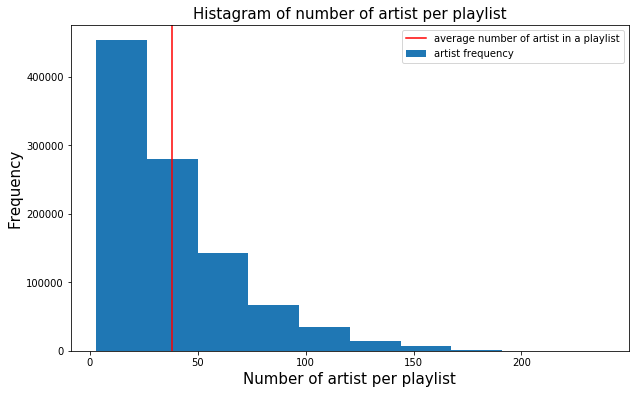

In [54]:
# Make the plot
plt.figure(figsize = (10,6))
plt.hist(x = df_playlist_unique.artist_uri,label = 'artist frequency')
plt.axvline(x= mean_artist ,label = 'average number of artist in a playlist',color = 'red')
plt.xlabel('Number of artist per playlist',fontsize =15)
plt.ylabel('Frequency',fontsize =15)
plt.title('Histagram of number of artist per playlist',fontsize = 15)
plt.legend()

Interpretation:

## Number of tracks per playlist / Length of each playlist (frequency plot)

In [19]:
# Calculate number of playlist:
df_track_playlist = pl_tracks.groupby(by = 'pid').size().reset_index(name='counts')
mean_track = df_track_playlist.counts.mean()

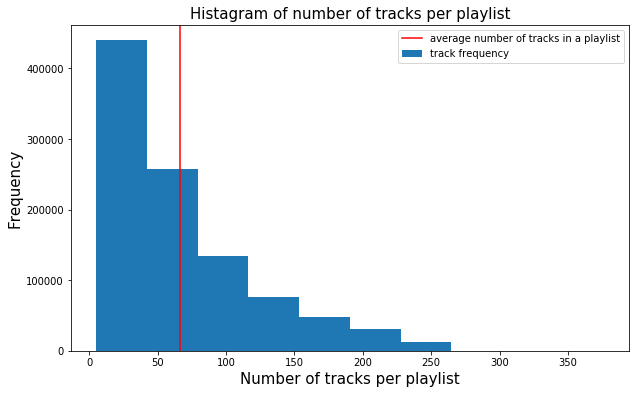

In [22]:
# Made the plot
plt.figure(figsize = (10,6))
plt.hist(x = df_track_playlist.counts,label = 'track frequency')
plt.axvline(x= mean_track,label = 'average number of tracks in a playlist',color = 'red')
plt.xlabel('Number of tracks per playlist',fontsize =15)
plt.ylabel('Frequency',fontsize =15)
plt.title('Histagram of number of tracks per playlist',fontsize = 15)
plt.legend()

## Distribution of popular tracks 

In [23]:
# Find the most popular tracks
df_track_order = pl_tracks.groupby(by = 'track_uri').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [24]:
df_track_order.head()

,track_uri,counts
2128659,spotify:track:7KXjTSCq5nL1LoYtL7XAwS,46574
573135,spotify:track:1xznGGDReH1oQq0xzbwXa3,43447
2257360,spotify:track:7yyRTcZmCiyzzJlNzGC9Ol,41309
2085721,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,41079
1041889,spotify:track:3a1lNhkSLSkpJE4MSHpDu9,39987


In [25]:
# I will choose the top 100 most popular songs
df_100_track = df_track_order.iloc[0:99,:]

In [40]:
df_100_track.head()

,track_uri,counts
2128659,spotify:track:7KXjTSCq5nL1LoYtL7XAwS,46574
573135,spotify:track:1xznGGDReH1oQq0xzbwXa3,43447
2257360,spotify:track:7yyRTcZmCiyzzJlNzGC9Ol,41309
2085721,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,41079
1041889,spotify:track:3a1lNhkSLSkpJE4MSHpDu9,39987
1656623,spotify:track:5hTpBe8h35rJ67eAWHQsJx,35202
649447,spotify:track:2EEeOnHehOozLq4aS0n6SL,35138
1261050,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,34999
2109995,spotify:track:7GX5flRQZVHRAGd6B4TmDO,34922
315514,spotify:track:152lZdxL1OR0ZMW6KquMif,34657


In [42]:
df_top100.head()

,track_uri,counts,track_name,duration_ms,artist_uri,album_uri
0,spotify:track:7KXjTSCq5nL1LoYtL7XAwS,46574,HUMBLE.,177000,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,spotify:album:4eLPsYPBmXABThSJ821sqY
1,spotify:track:1xznGGDReH1oQq0xzbwXa3,43447,One Dance,173986,spotify:artist:3TVXtAsR1Inumwj472S9r4,spotify:album:3hARKC8cinq3mZLLAEaBh9
2,spotify:track:7yyRTcZmCiyzzJlNzGC9Ol,41309,Broccoli (feat. Lil Yachty),225205,spotify:artist:5M0lbkGluOPXLeFjApw8r8,spotify:album:0NrZHZ0y5kTO8EHliuUUca
3,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,41079,Closer,244960,spotify:artist:69GGBxA162lTqCwzJG5jLp,spotify:album:0rSLgV8p5FzfnqlEk4GzxE
4,spotify:track:3a1lNhkSLSkpJE4MSHpDu9,39987,Congratulations,220293,spotify:artist:246dkjvS1zLTtiykXe5h60,spotify:album:5s0rmjP8XOPhP6HhqOhuyC
5,spotify:track:5hTpBe8h35rJ67eAWHQsJx,35202,Caroline,209640,spotify:artist:3Gm5F95VdRxW3mqCn8RPBJ,spotify:album:3lajefIuUk4SfzqVBSJy8p
6,spotify:track:2EEeOnHehOozLq4aS0n6SL,35138,iSpy (feat. Lil Yachty),253106,spotify:artist:4qBgvVog0wzW75IQ48mU7v,spotify:album:15qLmAABocTCRBSbWWqL7K
7,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,34999,Bad and Boujee (feat. Lil Uzi Vert),343150,spotify:artist:6oMuImdp5ZcFhWP0ESe6mG,spotify:album:2AvupjUeMnSffKEV05x222
8,spotify:track:7GX5flRQZVHRAGd6B4TmDO,34922,XO TOUR Llif3,182706,spotify:artist:4O15NlyKLIASxsJ0PrXPfz,spotify:album:733e1ZfktLSwj96X5rsMeE
9,spotify:track:152lZdxL1OR0ZMW6KquMif,34657,Location,219080,spotify:artist:6LuN9FCkKOj5PcnpouEgny,spotify:album:6kf46HbnYCZzP6rjvQHYzg


In [26]:
# Find the corresponding track name
df_100_trackname = tracks.loc[tracks.track_uri.isin(df_100_track.track_uri)]
df_top100 = df_100_track.merge(df_100_trackname,on = 'track_uri')

Text(0.5,0,'Frequency')

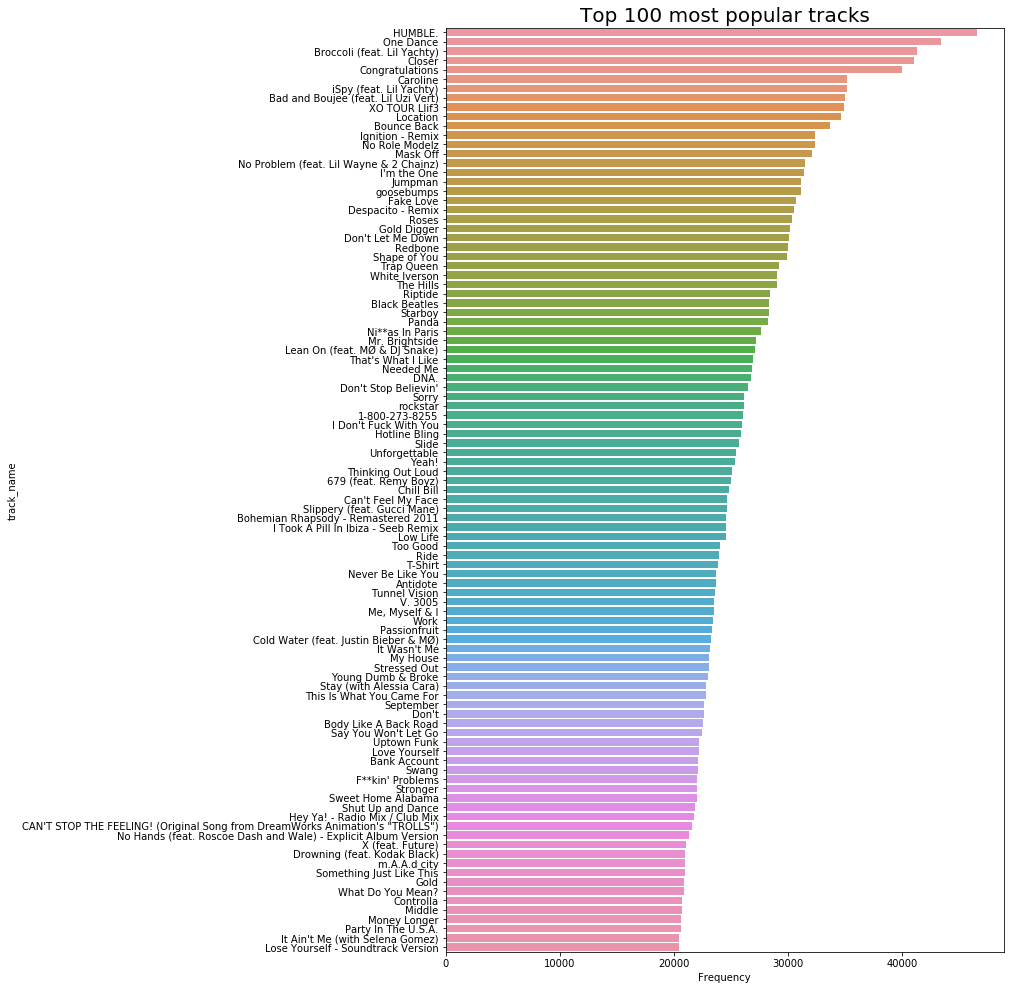

In [27]:
# Plot the top 100 songs
plt.figure(figsize = (10,17))
sns.barplot(x = 'counts',y = 'track_name', data = df_top100)
plt.title('Top 100 most popular tracks',fontsize = 20)
plt.xlabel('Frequency' )

In [28]:
# Calculate percentage of each playlist that contains the top 100 tracks
df_contain= pl_tracks.loc[pl_tracks.track_uri.isin(df_100_track.track_uri)]

In [29]:
df_contain_pid = df_contain.groupby(by = 'pid').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

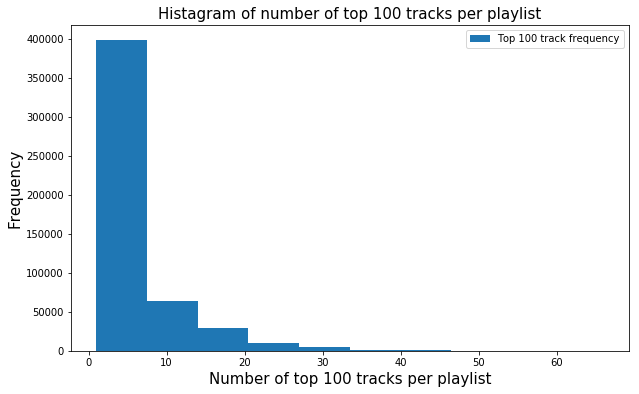

In [30]:
# General Idea of frequency of those top 100 tracks in the playlist
plt.figure(figsize = (10,6))
plt.hist(x = df_contain_pid.loc[df_contain_pid.counts> 0].counts,label = 'Top 100 track frequency')
plt.xlabel('Number of top 100 tracks per playlist',fontsize =15)
plt.ylabel('Frequency',fontsize =15)
plt.title('Histagram of number of top 100 tracks per playlist',fontsize = 15)
plt.legend()

## Most common words for top 1000 tracks

In [31]:
df_1000_track = df_track_order.iloc[0:999,:]
df_1000_trackname = tracks.loc[tracks.track_uri.isin(df_1000_track.track_uri)]
df_top1000 = df_1000_track.merge(df_1000_trackname,on = 'track_uri')

In [32]:
top1000_list = df_top1000.track_name.tolist()

In [33]:
split_words = [words for segments in top1000_list for words in segments.split()]
Most = Counter(split_words) 
Top50 = Most.most_common(50)
Top50df = pd.DataFrame(Top50,columns = ['Word','Counts'])

In [34]:
Top50df.head()

,Word,Counts
0,-,81
1,(feat.,67
2,You,64
3,The,61
4,Me,50
5,I,41
6,Love,32
7,It,30
8,My,29
9,&,28


Text(0.5,0,'Frequency')

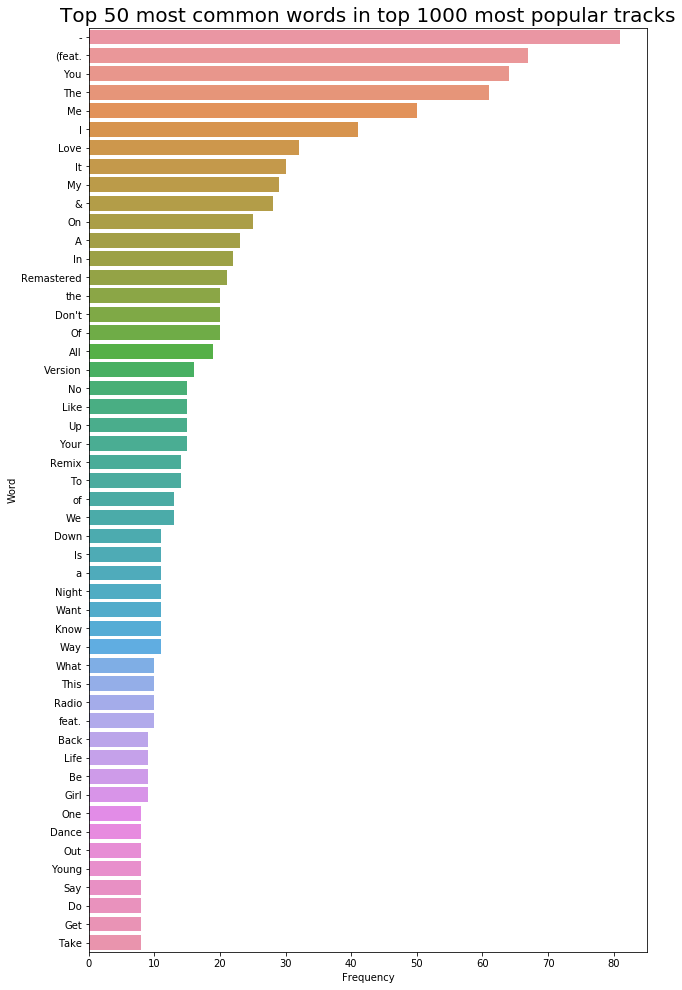

In [35]:
plt.figure(figsize = (10,17))
sns.barplot(x = 'Counts',y = 'Word', data = Top50df)
plt.title('Top 50 most common words in top 1000 most popular tracks',fontsize = 20)
plt.xlabel('Frequency' )